# Question of Interest    Fraud Detection Case Study - Prediction Whether Fraud Or Not 
***Due data: October 31, 2023***
Notebook 1: Exploratory Data Analysis (EDA)

Objective: Perform Exploratory Data Analysis on the provided dataset to gain insights and understand the data's characteristics.

Steps recommended:
1.	Introduction:
a.	Provide an overview of the problem statement (fraud detection) and mention the dataset's source and context.
b.	Briefly describe the data dictionary to give context about the features.
2.	Loading Data:
a.	Load the provided dataset into a pandas Data Frame.
b.	Perform basic checks like the number of rows and columns, data types, and missing values,etc.
3.	Data Exploration:
a.	Explore the distribution of the target variable (fraud vs. non-fraud) to understand class imbalance.
b.	Explore individual feature distributions (numerical and categorical) using appropriate visualizations (histograms, box plots, etc.).
c.	Analyze correlations between features to identify potential relationships.
4.	Train-Test Split:
a.	Split the data into training and testing sets, adhering to the mentioned train-test split ratio.
b.	Explain the reason for the chosen split ratio and its importance in model evaluation.
5.	Summary:
a.	Summarize key findings from the EDA, including any insights about the data's characteristics and potential challenges in fraud detection

Notebook 2: Feature Engineering

Objective: Transform and engineer features to improve the model's performance and predictive power.

Steps recommended:
1.	Feature Transformation:
a.	Handle missing values (if any) using appropriate techniques like imputation or removal based on justification.
b.	Encode categorical variables using suitable encoding methods (label encoding, one-hot encoding) and explain the choice for each variable.
c.	Scale numerical features using techniques like Min-Max scaling or Standardization, etc.
2.	Feature Creation:
a.	Create new features from existing ones if it adds value to the model (e.g., aggregations, interaction terms).
b.	Justify the creation of each new feature based on its relevance to fraud detection.
3.	Feature Selection:
a.	Use techniques like correlation, feature importance from tree-based models, or other relevant methods to select the most important features.
b.	Explain the rationale behind selecting specific features for the model.
4.	Summary:

Notebook 3: Model Development and Evaluation

Objective: Develop and evaluate machine learning models for fraud detection using the processed data.

Steps recommended:
1.	Model Selection:
a.	Choose appropriate machine learning algorithms (e.g., Logistic Regression, Random Forest, Gradient Boosting) based on the problem's nature.
b.	Justify the choice of models and explain why they are suitable for fraud detection.
2.	Model Training:
a.	Train the selected models using the processed training data.
b.	Tune hyperparameters using techniques like Grid Search or Random Search to optimize model performance.
c.	Document the hyperparameters used and the reason behind their selection.
3.	Model Evaluation:
a.	Evaluate models on the test dataset using relevant metrics (accuracy, precision, recall, F1-score, ROC AUC) as mentioned in the problem statement.
b.	Discuss the choice of evaluation metrics and their relevance to fraud detection.
c.	Provide detailed explanations of the results and compare the performance of different models.
4.	Conclusion:
a.	Summarize the entire process, including EDA, feature engineering, and model development.
b.	Discuss challenges faced, lessons learned, and potential future improvements.


### Importing Python Libraries

In [131]:
#For linting standard and code error check
!pip install pycodestyle pyflakes shap sweetviz

In [132]:
#Importing all the python libraries
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np 
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics as mt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import haversine as hs
#import folium 
#import googlemaps
from datetime import datetime
#gmaps = googlemaps.Client(key='Add Your Key here')
#import mpu
#from geopy.distance import geodesic 
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.feature_selection import chi2
#Shap Import
import shap
# importing sweetviz
import sweetviz as sv


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
df = pd.read_parquet('gdrive/My Drive/data.parquet')
print(df.shape)
df.head(2)

### Functions 

In [5]:
def transform_data(data, cols_leave):
    data = data.astype({i:'category' for i in cols_leave})
    data[cols_leave] = data[cols_leave].apply(lambda x:x.cat.codes)
    data = data.astype({i:'int' for i in cols_leave})
    return data
 
def feature_importance_plot(model, max_features,height= 0.8):
    fig,ax=plt.subplots(figsize=(10,10))
    xgb.plot_importance(model,max_num_features=max_features, height=height,ax=ax)
    return plt.show()
 
def feature_gain_plot(model, max_features=20):
    imp_type ='gain'
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    xgb.plot_importance(model, ax=ax, importance_type=imp_type, max_num_features=max_features)
    plt.title('Feature importance - ' + imp_type, fontsize=18, weight='bold')
    plt.ylabel('Features', fontsize=16, weight='bold')
    plt.xlabel('F Score', fontsize=16, weight='bold')
    plt.yticks(fontsize=14, weight='bold')
    return plt.show()
 
def roc_plot(fpr,tpr,roc_auc):
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
            label='ROC curve (area = {:0.4f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    # plt.scatter(medium['fpr'], medium['tpr'], marker='o', color='black', label='mid_thres = %.4f'%(medium['threshold']))
    # plt.scatter(high['fpr'], high['tpr'], marker='o', color='red', label='high_thres = %.4f'%(high['threshold'])) 
    # plt.scatter(low['fpr']/100, low['tpr']/100, marker='o', color='green', label='low_thres = %.4f'%(low['threshold']))         
    plt.grid()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    return plt.show()
 
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
 
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
 
    if cmap is None:
        cmap = plt.get_cmap('Blues')
 
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
 
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "black")
 
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def precision_recall_plot(y_test, y_prob, y_hat):
    precision, recall, threshodls = precision_recall_curve(y_test,y_prob) 
    lr_f1, lr_auc = f1_score(y_test, y_hat), auc(recall, precision)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))   
    plt.xticks(rotation=40)
    plt.yticks(rotation=40)
    ikchosp = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0,1], [ikchosp,ikchosp], linestyle='--', color = 'lightgrey')   
    plt.plot([1,0], [0,1], linestyle='--')
    # pyplot.scatter(medium['recall']/100, medium['precision']/100, marker='o', color='black', label='mid_thres = %.4f'%(medium['threshold']))
    # pyplot.scatter(high['recall']/100, high['precision']/100, marker='o', color='red', label='high_thres = %.4f'%(high['threshold'])) 
    # pyplot.scatter(low['recall']/100, low['precision']/100, marker='o', color='green', label='low_thres = %.4f'%(low['threshold']))         
    plt.plot(recall,
             precision,
             marker=',',
             label='f1=%.3f\nauc=%.3f'%(lr_f1,lr_auc),
             color='blue')
    # axis labels
    plt.grid()
    # pyplot.xlabel('Recall \n\n Optimal Precision = %.3f\nOptimal Recall = %.3f'%(medium['recall'],medium['precision']))
    plt.ylabel('Precision')
    plt.legend()
    # show the plot
    plt.show()
    
def select_cols_type(dataset, dtype):
    masks=(dataset.dtypes==dtype)
    return dataset.columns[masks].tolist()
 
def chi2_test_df(data, cat_columns):
    chi2_results = []
    df = data.copy(deep=True)
    df.dropna(inplace = True)
    for i in cat_columns:
        obs = pd.crosstab(index = df[i], columns = df['termflag'])
        chi2_results.append([i, chi2_contingency(obs)[0].round(2), chi2_contingency(obs)[1].round(4), chi2_contingency(obs)[2]])
    chi2_results_df = pd.DataFrame(chi2_results, columns=['Feature_name','chi-square-value','p-value','degrees of freedom'])
    return chi2_results_df

def ttest_df(data, cont_columns):
    ttest_results=[]
    df = data.copy(deep=True)
    df.dropna(inplace=True)
    for i in cont_columns:
        stat, p = ttest_ind(df[i][df.termflag==0], df[i][df.termflag==1])
        ttest_results_df = pd.DataFrame(ttest_results, columns = str('features,t-stats,p-value').split(','))
        return ttest_results_df
def f_score(df,label):
    chi_values=chi2(df,label)
    score = list(chi_values[0])
    feat = df.columns.tolist()
    fscore_df = pd.DataFrame({"Feature":feat, "Score":score})
    fscore_df.sort_values(by="Score", ascending=False,inplace = True)
    fscore_df.reset_index(drop=True, inplace=True)
    return fscore_df


In [22]:
def f_score(df,label):
    chi_values=chi2(df,label)
    score = list(chi_values[0])
    feat = df.columns.tolist()
    fscore_df = pd.DataFrame({"Feature":feat, "Score":score})
    fscore_df.sort_values(by="Score", ascending=False,inplace = True)
    fscore_df.reset_index(drop=True, inplace=True)
    return fscore_df
    
    
def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score


def acc_score_num(df,label,f_score_val,feat_list):
    Score = pd.DataFrame({"Classifier":classifiers})
    df2 = None
    for k in range(len(feat_list)):
        df2 = feat_select(df,f_score_val,feat_list[k])
        X_train,X_test,Y_train,Y_test = split(df2,label)
        j = 0
        acc = []
        for i in models:
            model = i
            model.fit(X_train,Y_train)
            predictions = model.predict(X_test)
            acc_val = accuracy_score(Y_test,predictions)
            acc.append(acc_val)
            j = j+1  
        feat = str(feat_list[k])
        Score[feat] = acc
    return Score
def plot2(df,l1,l2,p1,p2,c = "b"):
    feat = []
    feat = df.columns.tolist()
    feat = feat[1:]
    plt.figure(figsize = (16, 18))
    for j in range(0,df.shape[0]):
        value = []
        k = 0
        for i in range(1,len(df.columns.tolist())):
            value.append(df.iloc[j][i])
        plt.subplot(4, 4,j+1)
        ax = sns.pointplot(x=feat, y=value,color = c ,markers=["."])
        plt.text(p1,p2,df.iloc[j][0])
        plt.xticks(rotation=90)
        ax.set(ylim=(l1,l2))
        k = k+1
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

def feat_select(df,f_score_val,num):
    feat_list = list(f_score_val["Feature"][:num])
    return df[feat_list]


### Ensemble Model Functions 

In [24]:
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))

### EDA-Exploratory Data Analysis

In [4]:
dc = pd.read_csv('gdrive/My Drive/data_description.csv')
dc

,column,description
0,index,Unique Identifier for each row
1,trans_date_trans_time,Transaction DateTime
2,cc_num,Number of Customer
3,merchant,Merchant Name
4,category,Category of Merchant
5,amt,Amount of Transaction
6,first,First Name
7,last,Last Name
8,gender,Gender
9,street,Street Address


In [7]:
df = pd.read_parquet('gdrive/My Drive/data.parquet')
print(df.shape)
df.head(2)

(1852394, 22)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


### Sweet Biz EDA -Exploratory Data Analyis of Data Frame

In [133]:
#analyzing the dataset
advert_report = sv.analyze(df)


                                             |                                             | [  0%]   00:00 ->…

In [135]:
#display the report
advert_report.show_html('C:/BHN/BHNFraudPredictionEDAAnalysis.html')

Report C:/BHN/BHNFraudPredictionEDAAnalysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [8]:
# Display general statistic 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,1852394.0,4.173860e+17,1.309115e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1852394.0,7.006357e+01,1.592540e+02,1.000000e+00,9.640000e+00,4.745000e+01,8.310000e+01,2.894890e+04
zip,1852394.0,4.881326e+04,2.688185e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.992100e+04
lat,1852394.0,3.853931e+01,5.071470e+00,2.002710e+01,3.466890e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1852394.0,-9.022783e+01,1.374789e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1852394.0,8.864367e+04,3.014876e+05,2.300000e+01,7.410000e+02,2.443000e+03,2.032800e+04,2.906700e+06
unix_time,1852394.0,1.358674e+09,1.819508e+07,1.325376e+09,1.343017e+09,1.357089e+09,1.374581e+09,1.388534e+09
merch_lat,1852394.0,3.853898e+01,5.105604e+00,1.902742e+01,3.474012e+01,3.936890e+01,4.195626e+01,6.751027e+01
merch_long,1852394.0,-9.022794e+01,1.375969e+01,-1.666716e+02,-9.689944e+01,-8.744069e+01,-8.024511e+01,-6.695090e+01
is_fraud,1852394.0,5.210015e-03,7.199217e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [9]:
# Display datatype
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [50]:
#Found 14 Unique Category
df.category.unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [48]:
#Found 14 Unique Category
df.groupby(['category']).mean()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
category,,,,,,,,,,
entertainment,4.129874e+17,64.142968,48766.644447,38.595345,-90.233224,88327.460087,1.358653e+09,38.594233,-90.233021,0.002177
food_dining,4.193227e+17,50.994099,48454.085574,38.490538,-90.022531,94262.123286,1.358619e+09,38.490397,-90.022981,0.001568
gas_transport,4.024896e+17,63.477271,48762.985800,38.788388,-90.322403,69261.757963,1.358662e+09,38.787582,-90.323313,0.004106
grocery_net,4.311556e+17,53.688524,48794.901261,38.186739,-89.957936,118105.630137,1.358715e+09,38.185380,-89.960331,0.002697
grocery_pos,4.265836e+17,116.640146,48724.118065,38.543331,-90.222667,85881.529692,1.358621e+09,38.543264,-90.221506,0.012645
health_fitness,4.160799e+17,54.087964,49011.996956,38.635652,-90.343693,84964.109300,1.358642e+09,38.636194,-90.343388,0.001510
home,4.223619e+17,58.188180,48736.249020,38.504788,-90.211542,86045.885393,1.358644e+09,38.503540,-90.212180,0.001510
kids_pets,4.180739e+17,57.527851,48826.836385,38.514692,-90.243484,88337.659519,1.358719e+09,38.516384,-90.243078,0.001880
misc_net,4.227973e+17,80.181370,49219.292982,38.640155,-90.441992,85385.700377,1.358748e+09,38.637067,-90.441654,0.013039


In [53]:
df['gender'].value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

<AxesSubplot:ylabel='gender'>

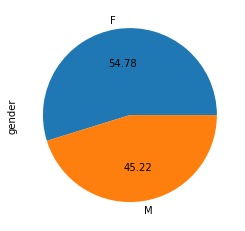

In [54]:
#let's show this with pie chart Gender based Is Fraud and NoTFraud Counts
df['gender'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
df['gender'].value_counts().plot.pie(autopct='%.2f')

In [55]:
#Let us See with in declared Fraud How many Percentage of Males and Females
dfFraud=df.loc[(df['is_fraud'] == 1)]

<AxesSubplot:ylabel='gender'>

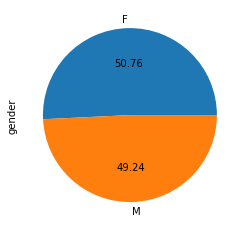

In [56]:
dfFraud['gender'].value_counts().plot.pie(autopct='%.2f')

In [57]:
#Found City Unique
df.city.unique()

array(['Moravian Falls', 'Orient', 'Malad City', 'Boulder', 'Doe Hill',
       'Dublin', 'Holcomb', 'Edinburg', 'Manor', 'Clarksville',
       'Clarinda', 'Shenandoah Junction', 'Saint Petersburg', 'Grenada',
       'High Rolls Mountain Park', 'Harrington Park', 'Lahoma',
       'Carlisle', 'Harborcreek', 'Elizabeth', 'Methuen', 'Moulton',
       'Plainfield', 'May', 'Waukesha', 'Bailey', 'Romulus', 'Freedom',
       'Honokaa', 'Valentine', 'Westfir', 'Tiptonville', 'Republic',
       'Baton Rouge', 'Washington', 'Big Creek', 'Bellmore', 'Florence',
       'Allentown', 'Moriches', 'Esbon', 'Chatham', 'Thompson',
       'North Prairie', 'Laredo', 'Grant', 'Conway', 'New Goshen',
       'Sunflower', 'Enola', 'Roosevelt', 'Pointe Aux Pins', 'Dallas',
       'Jay', 'North Tonawanda', 'Athena', 'Chester', 'Elkhart',
       'Surrency', 'Arcadia', 'Gaithersburg', 'Bowdoin', 'Heart Butte',
       'San Jose', 'Rumely', 'Cranks', 'Ravenna', 'Utica', 'Uledi',
       'Naples', 'Thida', 'Parks', 'C

In [58]:
#Found Merchant Unique
df.merchant.unique()

array(['fraud_Rippin, Kub and Mann', 'fraud_Heller, Gutmann and Zieme',
       'fraud_Lind-Buckridge', 'fraud_Kutch, Hermiston and Farrell',
       'fraud_Keeling-Crist', 'fraud_Stroman, Hudson and Erdman',
       'fraud_Rowe-Vandervort', 'fraud_Corwin-Collins',
       'fraud_Herzog Ltd', 'fraud_Schoen, Kuphal and Nitzsche',
       'fraud_Rutherford-Mertz', 'fraud_Kerluke-Abshire',
       'fraud_Lockman Ltd', 'fraud_Kiehn Inc', 'fraud_Beier-Hyatt',
       'fraud_Schmidt and Sons', 'fraud_Lebsack and Sons',
       'fraud_Mayert Group', 'fraud_Konopelski, Schneider and Hartmann',
       'fraud_Schultz, Simonis and Little', 'fraud_Bauch-Raynor',
       'fraud_Harris Inc', 'fraud_Kling-Grant', 'fraud_Pacocha-Bauch',
       'fraud_Lesch Ltd', 'fraud_Kunde-Sanford', "fraud_Deckow-O'Conner",
       'fraud_Bruen-Yost', 'fraud_Kunze Inc',
       'fraud_Nitzsche, Kessler and Wolff',
       'fraud_Kihn, Abernathy and Douglas', 'fraud_Torphy-Goyette',
       'fraud_Balistreri-Nader', 'fraud_Bahrin

In [59]:
#Found zip Unique
df.zip.unique()

array([28654, 99160, 83252, 59632, 24433, 18917, 67851, 22824, 15665,
       37040, 51632, 25442, 33710, 96038, 88325,  7640, 73754, 47838,
       16421,  7208,  1844, 52572,  7060, 76857, 53186, 27807, 48174,
       83120, 96727, 69201, 97492, 38079, 49879, 70808, 20012, 40914,
       11710, 39073, 18103, 11955, 66941, 12037, 84540, 53153, 78040,
       35747, 98238, 47863, 38778, 72047, 73564, 49775, 75210, 32565,
       14120, 97813, 21619, 50073, 31563, 49613, 20882,  4287, 59448,
       95148, 49826, 40820, 68869, 67584, 15484, 34112, 72165, 86018,
       47110, 82514, 22719, 39825,  1545, 56117, 16048, 43985, 80120,
        5461, 64659, 49628, 84532, 44412, 29819, 23860, 90250, 20895,
       89319, 51521, 52768, 75092, 33470, 71762, 15324, 15056, 82227,
       11978, 10162, 56548,  7711, 93529, 97476, 68950, 36009,  1612,
       68881, 22853, 15432, 73027, 42701, 13342, 39653, 61454, 70531,
       13615, 23937, 63021, 95537, 33417, 12992, 24266, 36749, 22015,
       50595, 66070,

In [60]:
#Found state Unique
df.state.unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

In [61]:
#Found Job Unique
df.job.unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

Text(0.5, 1.0, 'Fraudulent Transcations Count with different Categories purchased under different Merchants')

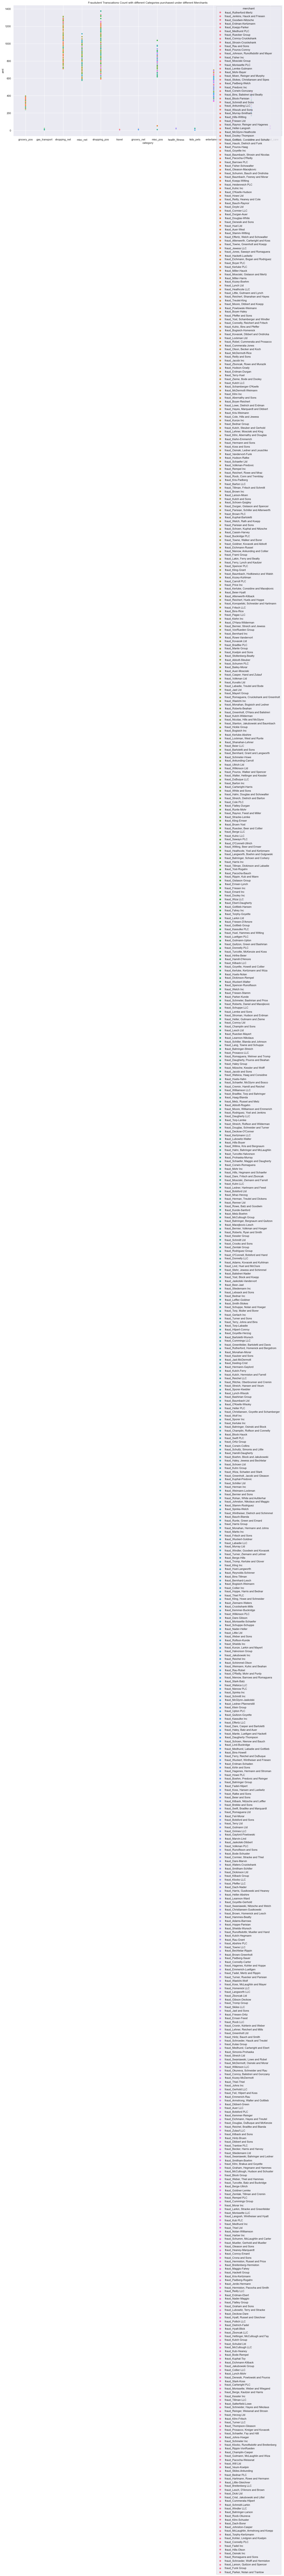

In [63]:
#Checking Based on Category Fraud Counts
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=dfFraud, x="category", y="amt", hue="merchant")
plt.title("Fraudulent Transcations Count with different Categories purchased under different Merchants")

### Found Highest Number of Fradulent Transactions occured in Shopping_POS - Shopping using Point of Sales Systems
### Found Second Highest Number of Fradulent Transactions occured in Shopping_POS - Shopping in Internet
### Found Third Highest Number of Fradulent Transactions occured in Misc Net - Miscellaneous Shopping in Internet

In [7]:
# Categorical variables 
col_dtype = pd.DataFrame(df.dtypes.copy())
cat_var = col_dtype[col_dtype[0]=='object'].reset_index()
print('Catagorical Variables are:')
cat_var['index'].tolist()

Catagorical Variables are:


['trans_date_trans_time',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob',
 'trans_num']

In [8]:
col_dtype = pd.DataFrame(df.dtypes.copy())
Numeric_var = col_dtype[col_dtype[0]=='float64'].reset_index()
print('Continuous numerical Variables are:')
print(Numeric_var['index'].tolist())

Continuous numerical Variables are:
['amt', 'lat', 'long', 'merch_lat', 'merch_long']


In [9]:
# Check missing values of all rows
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### No Null Values Found

In [65]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df[df.is_fraud == 1] 
df_non_fraud =df[df.is_fraud == 0]

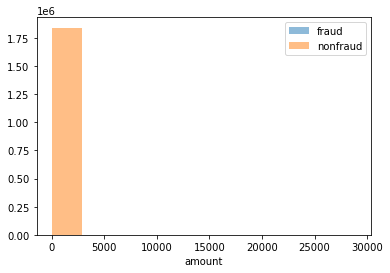

In [11]:
# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amt, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amt, alpha=0.5, label='nonfraud')
plt.xlabel('amount')
plt.legend()
plt.show()

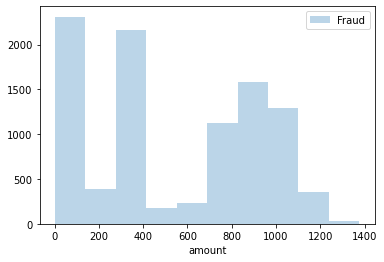

In [12]:
# Plot histograms of the amounts in Fraud  
plt.hist(df_fraud.amt, alpha=0.3, label='Fraud')
plt.xlabel('amount')
plt.legend()
plt.show()

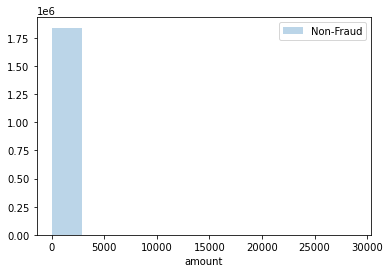

In [13]:
# Plot histograms of the amounts in Non-Fraud  
plt.hist(df_non_fraud.amt, alpha=0.3, label='Non-Fraud')
plt.xlabel('amount')
plt.legend()
plt.show()

In [14]:
# find maximum amount value of a Fraud Yes 
maxAmountFraud = df_fraud['amt'].max()
print("Maximum Transaction value in Fraud 'Amount': ")
print(maxAmountFraud)

Maximum Transaction value in Fraud 'Amount': 
1376.04


In [66]:
# find maximum amount value of a Fraud No , Few Outlier Transcations Not Market as Fraud But Definitely Fraud
maxAmountNoTFraud = df_non_fraud['amt'].max()
print("Maximum Transaction value in Non-Fraud 'Amount': ")
print(maxAmountNoTFraud)

Maximum Transaction value in Non-Fraud 'Amount': 
28948.9


### Found Not Fraud 1090 Transactions with greater than $2000, with in that  got maximum transaction amount is 28949 Dollars

In [68]:
#df_non_fraud_outliers=df_non_fraud[[df_non_fraud.amt>1000]]
df_non_fraud_outliers=df_non_fraud.loc[(df_non_fraud['amt'] >=2000)]

In [70]:
len(df_non_fraud_outliers)

1090

### Few Non Fraud looks like Potential Fraud Transactions

In [71]:
df_non_fraud_outliers.value_counts()

trans_date_trans_time  cc_num               merchant                                category      amt       first      last        gender  street                          city        state  zip    lat      long       city_pop  job                                                dob         trans_num                         unix_time   merch_lat  merch_long   is_fraud
2019-01-01 18:51:15    341546199006537      fraud_Boyer-Haley                       travel        3178.51   Mark       Brown       M       8580 Moore Cove                 Wales       AK     99783  64.7556  -165.6723  145       Administrator, education                           1939-11-09  7083124580d6a391d678fb76b67a1ebb  1325443875  64.396477  -165.209648  0           1
2020-06-18 23:43:03    4908846471916297     fraud_Veum-Koelpin                      travel        12176.55  Lauren     Torres      F       03030 White Lakes               Grandview   TX     76050  32.2779  -97.2351   5875      Radiographer, therapeutic     

In [16]:
#Finding Target IsFraud Counts
# Count the occurrences of fraud and no fraud and print them
occ=df['is_fraud'].value_counts()
occ

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [17]:
'''Found Imbalanced Target Is Fraud Values of  9651 Yes Values and 1842743 No Values'''

'Found Imbalanced Target Is Fraud Values of  9651 Yes Values and 1842743 No Values'

<AxesSubplot:ylabel='is_fraud'>

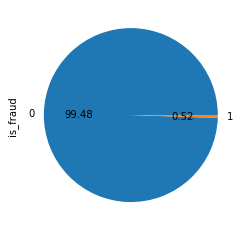

In [18]:
#let's show this with pie chart Is Fraud and NoTFraud Counts
df['is_fraud'].value_counts().plot.pie(autopct='%.2f')

### Correlation Analysis

In [117]:
df2 = df

In [118]:
Num_var=df2.loc[:,df.dtypes!=np.object]  

In [119]:
Num_var.head(2)

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0


In [120]:
Num_var_one = Num_var.iloc[:,0:9] 

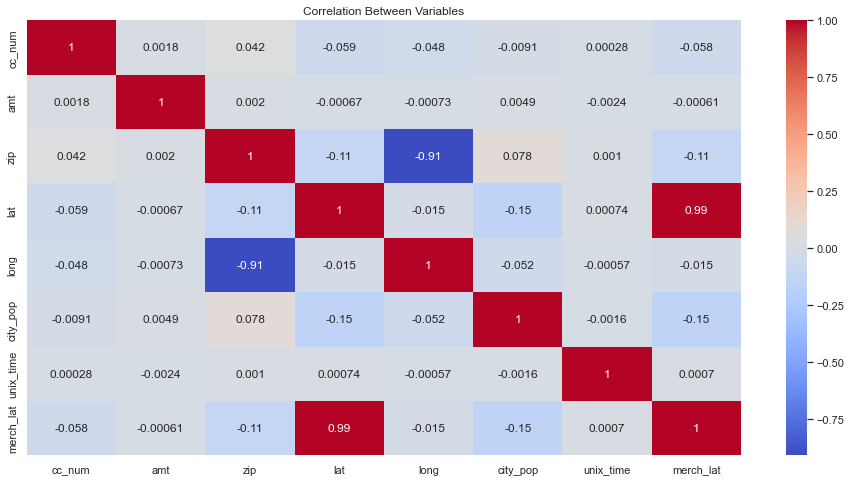

In [121]:
plt.figure(figsize=(16,8))
sns.heatmap(Num_var_one.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()

### Seeing Lat Positive Correlations and Long Negative Correlations

In [122]:
corr_attributes= df2[['cc_num','amt','zip','is_fraud']] 

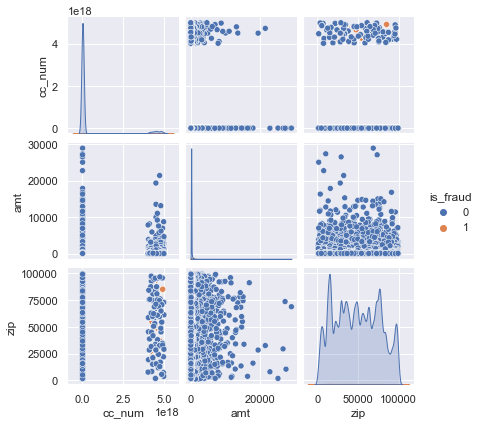

In [123]:
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.pairplot(corr_attributes, hue='is_fraud', height=2)

## Models Predictors and Feature Selection and Validation

### Models Predictors are all Numerical Variables With Category and Gendor Categorical Variables is being used , since other Catagorical Variables Unique Values more than 700 [Mercent] and Others are Over 100

### Training/Testing Data Preparation

In [8]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [9]:

train = df[df['trans_date_trans_time']<=pd.to_datetime('2020-06-21 12:13:37')]
test  = df[df['trans_date_trans_time']>=pd.to_datetime('2020-06-21 12:14:25')]

print('Shape of Dataset =', train.shape, test.shape)
print('Mean Fraud Rate  =', train['is_fraud'].mean(), test['is_fraud'].mean())


Shape of Dataset = (1296675, 22) (555719, 22)
Mean Fraud Rate  = 0.005788651743883394 0.0038598644278853163


In [24]:
train.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [26]:
# Splitting Target Is Fraud and Predictors
#index_cols = ['cc_num']
response = 'is_fraud'
X_train, y_train = train.drop(response, axis=1), train[response]
print(X_train.shape, y_train.shape)

(1296675, 21) (1296675,)


In [27]:
X_test, y_test = test.drop(response, axis=1), test[response]
print(X_test.shape, y_test.shape)

(555719, 21) (555719,)


In [30]:
#Using Scikit-learn XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1,
                    enable_categorical=True,
                    eval_metric='logloss',
                    n_estimators=200,
                    scale_pos_weight=1.99,
                    learning_rate = 0.001,
                    gamma=0.5)


In [ ]:
# Still XGBoost with out encoding categorical variable only experiment support not supported in Stable Version even enable_categorical=True
'''ValueError: Experimental support for categorical data is not implemented for current tree method yet.'''


In [25]:
'''Encoding train and test's Gender and Category Values because of XGBoost not directly accepting Categorical Variables'''

"Encoding test's Gender and Category Values"

In [ ]:
#Creating Train and Test Data only with Category and gender Categorical and Numerical Variables for Train and Test

In [11]:
#Filtering Data All Numerical Variables With Gender and Category, Since Other Categorical Variables are toomany Unique Values
train_filtered=train[['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','is_fraud','category','gender']]

In [12]:
#Encoding train's Gender and Category Values
label=LabelEncoder()
for c in  train_filtered.columns:
    if(train_filtered[c].dtype=='object'):
        train_filtered[c]=label.fit_transform(train_filtered[c])
    else:
        train_filtered[c]=train_filtered[c]
        
train_filtered.head(3)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category,gender
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,8,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,4,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,0,1


In [13]:
train_filtered.shape

(1296675, 12)

In [14]:
responsetrain_filtered = 'is_fraud'
X_trained_filtered, y_trained_filtered = train_filtered.drop(responsetrain_filtered, axis=1), train[responsetrain_filtered]
print(X_trained_filtered.shape, y_trained_filtered.shape)

(1296675, 11) (1296675,)


In [15]:
test_filtered=test[['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','is_fraud','category','gender']]

In [16]:
#Encoding test's Gender and Category Values
label=LabelEncoder()
for c in  test_filtered.columns:
    if(test_filtered[c].dtype=='object'):
        test_filtered[c]=label.fit_transform(test_filtered[c])
    else:
        test_filtered[c]=test_filtered[c]
       
test_filtered.head(3)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category,gender
1296675,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,10,1
1296676,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,10,0
1296677,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,5,0


In [17]:
test_filtered.shape

(555719, 12)

In [18]:
responsetest_filtered = 'is_fraud'
X_test_filtered, y_test_filtered = test_filtered.drop(responsetest_filtered, axis=1), test_filtered[responsetest_filtered]
print(X_test_filtered.shape, y_test_filtered.shape)

(555719, 11) (555719,)


In [34]:
X_test_filtered

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,category,gender
1296675,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,10,1
1296676,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,10,0
1296677,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,5,0
1296678,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,9,1
1296679,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,13,1
...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,5,1
1852390,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,7,1
1852391,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,7,0
1852392,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,13,1


## Features Selection Validation

### Feature Selection
##### Recursive Feature Elimination(RFE)
The feature selection used in python is Recursive Feature Elimination(RFE), which recursively selects smaller and smaller amount of features until the final recommended features are selected.

In [35]:
#Recursive Feature Elimination to identify features
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20,step=1) 
# Feed scalled features into rfe
rfe = rfe.fit(X_trained_filtered,y_trained_filtered)

In [37]:
for f,i in zip(X_trained_filtered.columns.values,rfe.ranking_):
    print('Feature Name:',f,'Important Rank', '--->',i) 

Feature Name: cc_num Important Rank ---> 1
Feature Name: amt Important Rank ---> 1
Feature Name: zip Important Rank ---> 1
Feature Name: lat Important Rank ---> 1
Feature Name: long Important Rank ---> 1
Feature Name: city_pop Important Rank ---> 1
Feature Name: unix_time Important Rank ---> 1
Feature Name: merch_lat Important Rank ---> 1
Feature Name: merch_long Important Rank ---> 1
Feature Name: category Important Rank ---> 1
Feature Name: gender Important Rank ---> 1


In [38]:
#Getting Summary Report
logit_model  = sm.Logit(y_trained_filtered,X_trained_filtered)
results = logit_model.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.032000
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.101     
Dependent Variable: is_fraud         AIC:              82996.3091
Date:               2023-10-25 04:52 BIC:              83044.6103
No. Observations:   1296675          Log-Likelihood:   -41494.   
Df Model:           3                LL-Null:          -46154.   
Df Residuals:       1296671          LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
cc_num       -0.0000    0.0000   -1.0962  0.2730  -0.0000   0.0000
amt           0.0027    0.0000   84.7536  0.0000   0.0026   0.

In [39]:
'''Found Zip , cc_num lat, long, merch_long and mech_lat not influencing much on finding is fraud or not'''

'Found Zip , cc_num lat, long, merch_long and mech_lat no influence on finding is fraud or not'

# Modeling 

In [19]:
dtrain, dtest = xgb.DMatrix(data = X_trained_filtered, label = y_trained_filtered), xgb.DMatrix(data=X_test_filtered, label = y_test_filtered)
 
params = {"objective":"binary:logistic", 'colsample_bytree':0.3, 'alpha':10}
 
parameters = {'objective': 'binary:logistic',
  'colsample_bytree': 0.9,
  'alpha': 10,
  'max_depth': 8,
  'min_child_weight': 9,
  'subsample': 0.7,
  'enable_categorical':True,
  'eta': 0.1}
 
model = xgb.train( params,
    dtrain,
    num_boost_round=999,
    evals=[(dtest, "Test")],
    early_stopping_rounds=15
)

[19:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	Test-logloss:0.44213
[1]	Test-logloss:0.30363
[2]	Test-logloss:0.21684
[3]	Test-logloss:0.15573
[4]	Test-logloss:0.11584
[5]	Test-logloss:0.08805
[6]	Test-logloss:0.06837
[7]	Test-logloss:0.05446
[8]	Test-logloss:0.04459
[9]	Test-logloss:0.03892
[10]	Test-logloss:0.03354
[11]	Test-logloss:0.02582
[12]	Test-logloss:0.02200
[13]	Test-logloss:0.01992
[14]	Test-logloss:0.01853
[15]	Test-logloss:0.01662
[16]	Test-logloss:0.01596
[17]	Test-logloss:0.01482
[18]	Test-logloss:0.01452
[19]	Test-logloss:0.01413
[20]	Test-logloss:0.01404
[21]	Test-logloss:0.01398
[22]	Test-logloss:0.01392
[23]	Test-logloss:0.01392
[24]	Test-logloss:0.01429
[25]	Test-logloss:0.01364
[26]	Test-logloss:0.0132

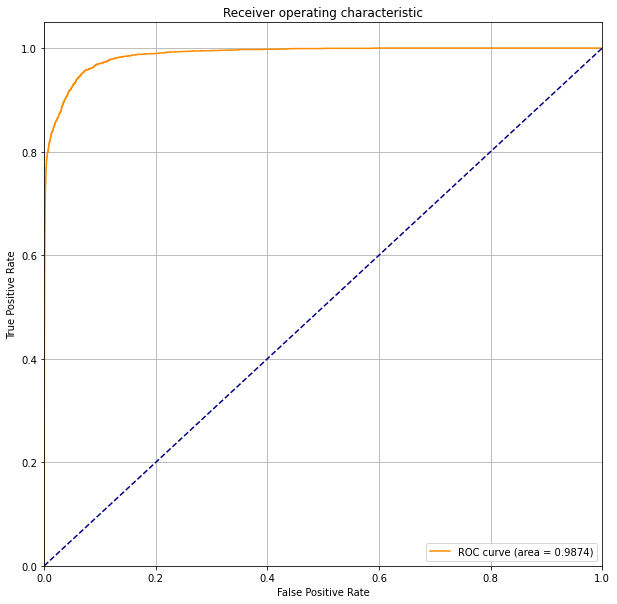

In [20]:
y_prob=model.predict(dtest)
fpr, tpr, thrhld = roc_curve(y_test_filtered.astype('int'), y_prob)
roc_auc = roc_auc_score(y_test_filtered.astype('int'), y_prob)
roc_plot(fpr,tpr,roc_auc)

In [ ]:
'''Found ROC got 0.9874 but real emphasize on False Positives which is key for good model'''

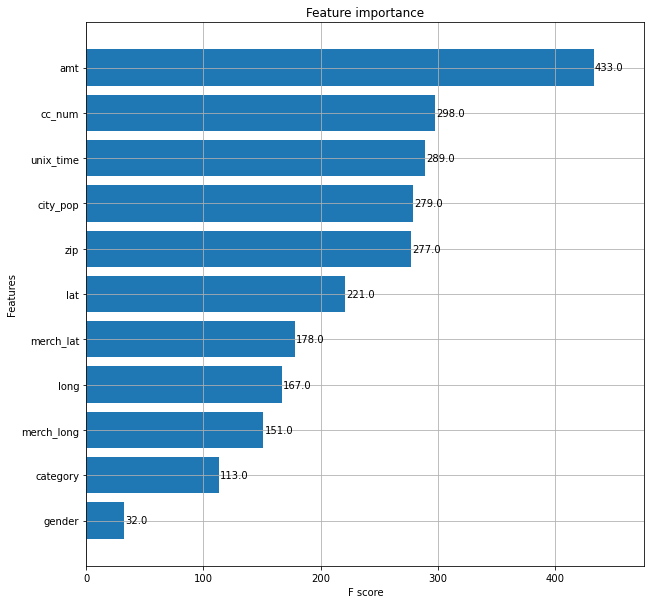

In [42]:
#Features Important Plot provides clearly provides importance of each predictors
feature_importance_plot(model, max_features=15,height= 0.8)

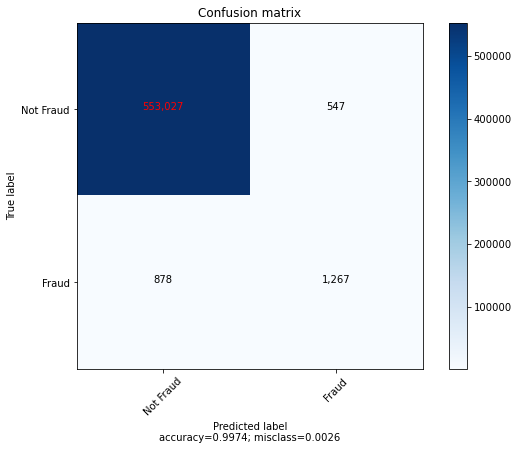

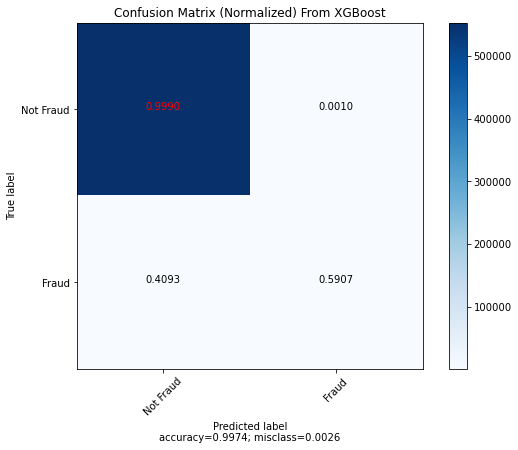

In [43]:
y_hat = [0 if i < 0.4 else 1 for i in y_prob]
cm = confusion_matrix(y_test_filtered.astype('int'), y_hat)
plot_confusion_matrix(cm, target_names = ['Not Fraud', 'Fraud'], normalize = False)
plot_confusion_matrix(cm, target_names = ['Not Fraud', 'Fraud'], normalize = True, title = 'Confusion Matrix (Normalized) From XGBoost')


In [44]:
cmatrix=confusion_matrix(y_test_filtered,y_hat)
cmatrix

array([[553027,    547],
       [   878,   1267]], dtype=int64)

In [ ]:
'''Below Confusion Matrix got False Positve 0.10% is markable meaning out of 1000 good Non Fraud credit card transactions is only made as false 1 in 1000, so customer going to frustrate and leave BHN if high False Positive Rate'''

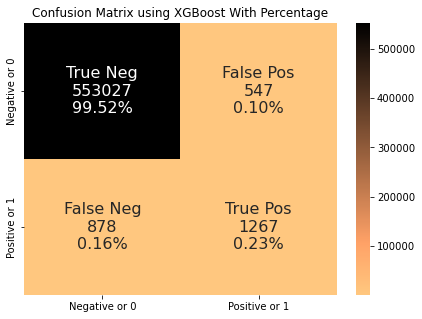

In [45]:
group_names = ['True Neg','False Pos','False Neg','True Pos'] 
group_counts = ['{0:0.0f}'.format(value) for value in cmatrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cmatrix.flatten()/np.sum(cm)]
labels = [f"{var1}\n{var2}\n{var3}" for var1,var2,var3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(7,5)) 
sns.heatmap(cmatrix,
            annot=labels,
            fmt='',
            cmap='copper_r',
            xticklabels=['Negative or 0','Positive or 1'], 
            yticklabels=['Negative or 0','Positive or 1'], 
            annot_kws={'size':16})
plt.title('Confusion Matrix using XGBoost With Percentage')
plt.show() 

### The Above XGB Boost Classification Report Precision [Emphasize on False Positive] is 0's 1 and 1's 0.06, with f1-score 0's 0.97 and 1's 0.12 with Precision of 0.70 

# Predictions

In [21]:
X_t =X_test_filtered.reset_index()
y_pred=model.predict(dtest)
y_prob=model.predict(dtest)
y_hats_df = pd.DataFrame(data = y_pred, columns = ['y_pred'])
df_out = pd.merge(X_t, y_hats_df, how = 'inner', left_index = True, right_index = True)
dft=pd.DataFrame({'Actual': y_test_filtered, 'Predicted':y_prob})
dft=dft.reset_index()
dft.tail(5)

,index,Actual,Predicted
555714,1852389,0,0.000107
555715,1852390,0,0.000311
555716,1852391,0,0.000078
555717,1852392,0,0.001276
555718,1852393,0,0.000019


### Predicting Non Fraud Outlier Transactions got from Data Frame df_non_fraud_outliers of 1090 records >2000 Dollars

In [72]:
df_nonfraud_outlier=df_non_fraud_outliers[['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','is_fraud','category','gender']]

In [98]:
df_nonfraud_outlier.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category,gender
1784,341546199006537,3178.51,99783,64.7556,-165.6723,145,1325443875,64.396477,-165.209648,0,4,1
5627,3589255887819806,2753.89,21750,39.6991,-78.1762,3766,1325693091,38.771454,-77.310217,0,3,1
11469,3589255887819806,2330.68,21750,39.6991,-78.1762,3766,1325962004,39.026244,-77.419897,0,2,1
12084,3567697931646329,5444.24,12534,42.2470,-73.7552,17867,1325980236,41.588036,-73.799288,0,3,1
14254,4561546772499,2612.14,87035,34.9889,-106.0609,7268,1326062486,35.409797,-106.224560,0,3,1


In [73]:
#Encoding train's Gender and Category Values
label=LabelEncoder()
for c in  df_nonfraud_outlier.columns:
    if(df_nonfraud_outlier[c].dtype=='object'):
        df_nonfraud_outlier[c]=label.fit_transform(df_nonfraud_outlier[c])
    else:
        df_nonfraud_outlier[c]=df_nonfraud_outlier[c]
        
df_nonfraud_outlier.head(3)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category,gender
1784,341546199006537,3178.51,99783,64.7556,-165.6723,145,1325443875,64.396477,-165.209648,0,4,1
5627,3589255887819806,2753.89,21750,39.6991,-78.1762,3766,1325693091,38.771454,-77.310217,0,3,1
11469,3589255887819806,2330.68,21750,39.6991,-78.1762,3766,1325962004,39.026244,-77.419897,0,2,1


### Spliting Outlier Records of 1090 records >2000 Dollars

In [74]:
outlierresponse='is_fraud'
X_outlier, y_outlier = df_nonfraud_outlier.drop(df_nonfraud_outlier, axis=1), df_nonfraud_outlier[outlierresponse]
print(X_outlier.shape, y_outlier.shape)

(1090, 0) (1090,)


### Sampled 1090 outlier data into 750 train and 340 test records

In [81]:
df_outlier_train=df_nonfraud_outlier.sample(750)

In [99]:
df_outlier_train

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category,gender
649515,4452366298769043,2405.26,76626,32.0758,-96.7010,1563,1349300951,31.115377,-96.359512,0,4,0
613381,4358137750029944984,2488.48,50664,42.7012,-92.0762,53,1347884689,43.177562,-91.892694,0,3,0
837204,4561546772499,5695.02,87035,34.9889,-106.0609,7268,1355344542,35.932092,-106.998205,0,4,1
1245847,3592931352252641,14849.74,55001,44.8696,-92.8234,2916,1370198724,44.840202,-92.501193,0,4,1
1522809,4254074738931278,2080.36,14707,42.0737,-78.0594,239,1378774992,41.913031,-78.879285,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1616297,374930071163758,2411.63,48174,42.2203,-83.3583,31515,1382290277,43.063432,-82.764578,0,3,1
1178347,676173792455,2054.50,90403,34.0287,-118.4924,92043,1367875923,34.706160,-117.906930,0,4,0
1737213,676372984911,3858.51,66941,39.7562,-98.4462,242,1386361894,39.168777,-97.739997,0,2,0
275747,3582754887089201,3579.08,71960,34.4596,-93.6743,1383,1337188455,33.754175,-92.676057,0,4,1


In [102]:
X_trains_outlier=df_outlier_train[['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','category','gender']]

In [104]:
X_trains_outlier

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,category,gender
649515,4452366298769043,2405.26,76626,32.0758,-96.7010,1563,1349300951,31.115377,-96.359512,4,0
613381,4358137750029944984,2488.48,50664,42.7012,-92.0762,53,1347884689,43.177562,-91.892694,3,0
837204,4561546772499,5695.02,87035,34.9889,-106.0609,7268,1355344542,35.932092,-106.998205,4,1
1245847,3592931352252641,14849.74,55001,44.8696,-92.8234,2916,1370198724,44.840202,-92.501193,4,1
1522809,4254074738931278,2080.36,14707,42.0737,-78.0594,239,1378774992,41.913031,-78.879285,3,1
...,...,...,...,...,...,...,...,...,...,...,...
1616297,374930071163758,2411.63,48174,42.2203,-83.3583,31515,1382290277,43.063432,-82.764578,3,1
1178347,676173792455,2054.50,90403,34.0287,-118.4924,92043,1367875923,34.706160,-117.906930,4,0
1737213,676372984911,3858.51,66941,39.7562,-98.4462,242,1386361894,39.168777,-97.739997,2,0
275747,3582754887089201,3579.08,71960,34.4596,-93.6743,1383,1337188455,33.754175,-92.676057,4,1


In [105]:
y_trains_outlier=df_outlier_train['is_fraud']

In [106]:
y_trains_outlier

649515     0
613381     0
837204     0
1245847    0
1522809    0
          ..
1616297    0
1178347    0
1737213    0
275747     0
109741     0
Name: is_fraud, Length: 750, dtype: int64

In [110]:
X_tests_outlier=df_outlier_test[['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','category','gender']]

In [111]:
X_tests_outlier

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,category,gender
174991,3524574586339330,2025.15,32960,27.6330,-80.4031,105638,1333291927,28.215180,-80.765061,3,0
699235,4653879239169997,2222.90,42171,37.0581,-86.1938,6841,1351208895,37.777504,-85.977281,3,0
1488516,6592861994408652,2796.64,14037,42.8112,-78.4481,1166,1377619634,42.716230,-77.983386,2,0
1416735,4198470814557,5899.86,51521,41.4768,-95.3509,2036,1375455399,42.105221,-95.516901,2,0
924820,4169759661243568,2194.47,17041,40.2236,-76.5380,213,1356997585,40.172257,-76.812872,3,0
...,...,...,...,...,...,...,...,...,...,...,...
1585726,5501083170975659,2419.54,44223,41.1464,-81.5107,47772,1381128616,40.735022,-81.766019,0,1
851248,501802953619,4029.36,96037,41.5403,-122.9366,308,1355593992,41.298827,-123.869247,4,1
1564888,370612217861404,2012.80,19007,40.1159,-74.8536,21125,1380380865,39.493909,-74.276808,3,0
220497,374930071163758,4084.34,48174,42.2203,-83.3583,31515,1335044222,43.018872,-83.130319,0,1


In [92]:
df_outlier_test=df_nonfraud_outlier.sample(340)

In [100]:
df_outlier_test

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category,gender
174991,3524574586339330,2025.15,32960,27.6330,-80.4031,105638,1333291927,28.215180,-80.765061,0,3,0
699235,4653879239169997,2222.90,42171,37.0581,-86.1938,6841,1351208895,37.777504,-85.977281,0,3,0
1488516,6592861994408652,2796.64,14037,42.8112,-78.4481,1166,1377619634,42.716230,-77.983386,0,2,0
1416735,4198470814557,5899.86,51521,41.4768,-95.3509,2036,1375455399,42.105221,-95.516901,0,2,0
924820,4169759661243568,2194.47,17041,40.2236,-76.5380,213,1356997585,40.172257,-76.812872,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1585726,5501083170975659,2419.54,44223,41.1464,-81.5107,47772,1381128616,40.735022,-81.766019,0,0,1
851248,501802953619,4029.36,96037,41.5403,-122.9366,308,1355593992,41.298827,-123.869247,0,4,1
1564888,370612217861404,2012.80,19007,40.1159,-74.8536,21125,1380380865,39.493909,-74.276808,0,3,0
220497,374930071163758,4084.34,48174,42.2203,-83.3583,31515,1335044222,43.018872,-83.130319,0,0,1


### Getting Train and Test Model Validation Data Sets from Outliers 1090 Records Sample

In [114]:
dtrains_outlier, dtests_outlier = xgb.DMatrix(data = X_trains_outlier, label = y_trains_outlier), xgb.DMatrix(data=X_tests_outlier, label = y_tests_outlier)
 


### Model Predicted Outliers 1090 Records Marked Non Fraud Validated with Model Prediction- Model Predicted Correctly as shown below 

In [115]:
X_t_s_outlier =X_tests_outlier.reset_index()
y_preds_outlier=model.predict(dtests_outlier)
y_probs_outlier=model.predict(dtests_outlier)
y_hats_df_outlier = pd.DataFrame(data = y_preds_outlier, columns = ['y_preds_outlier'])
df_out_outlier = pd.merge(X_t_s_outlier, y_hats_df_outlier, how = 'inner', left_index = True, right_index = True)
dfts_outlier=pd.DataFrame({'Actual': y_tests_outlier, 'Predicted':y_probs_outlier})
dfts_outlier=dfts_outlier.reset_index()
dfts_outlier.tail(5)

,index,Actual,Predicted
335,1585726,0,0.002171
336,851248,0,0.034125
337,1564888,0,0.009537
338,220497,0,0.003009
339,923829,0,0.051354


### Above Predictions are looks correct , Model is predicted correctly

## Shap Dependency Impact On Model Output And CardNumber 

### Found Transactions System Time[Unix_Time], Gender,Zip, Lat, Long, Merch Lat, Long and part of Category and slice of Amount influencing Target

In [127]:
shap_values = shap.TreeExplainer(model).shap_values(X_trains_outlier)

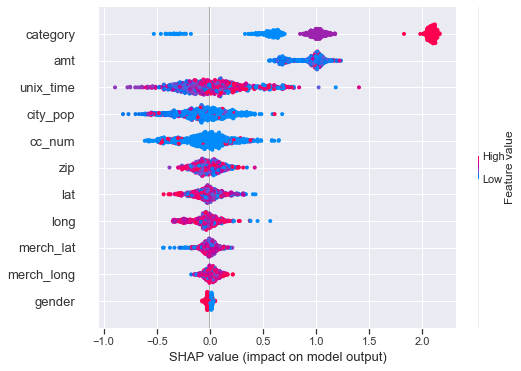

In [128]:
shap.summary_plot(shap_values, X_trains_outlier)

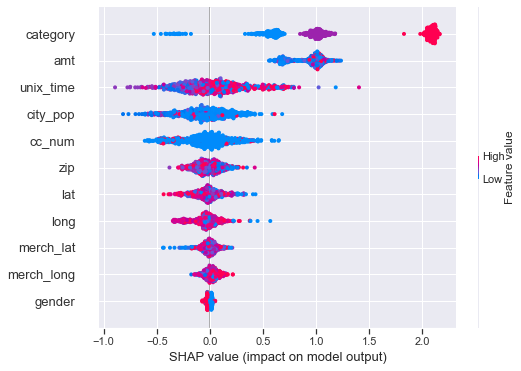

In [129]:
# visualization
%matplotlib inline
shap.summary_plot(shap_values, X_trains_outlier)

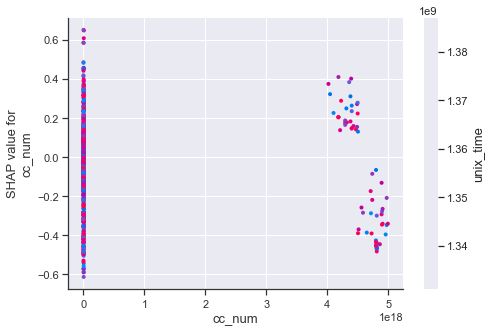

In [130]:
# setting card num allows us to continue customizing the matplotlib plot before displaying it
shap.dependence_plot("cc_num", shap_values, X_trains_outlier)

### There are two XGBClassifiers 
1)XGB Classified from XGBOOST
2)XGBClassifier from Sci-Kit Learm XGBClassifier

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier

In [33]:
#2)Scikit Learm XGBClassifier
from xgboost import XGBClassifier
'''scale_pos_weight is very useful parameter for adjusting imbalanced data by [default=1] but as per XGBoost Documentation 
Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances). See Parameters Tuning for more discussion.
So In our case 9651 of 1's vs 1842743 0's so 1842743/9651=190 and  9651/1842743=0.0053

In [53]:
#Using Scikit-learn XGBoost
xgbst = XGBClassifier(random_state=1,
                    eval_metric='logloss',
                    n_estimators=200,
                    scale_pos_weight=190,
                    learning_rate = 0.001,
                    gamma=0.5)

xgbst.fit(X_trained_filtered, y_trained_filtered)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0.5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=190, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
'''I got ROC 0.802 for scale_pos_weight=0.99,scale_pos_weight=0.0053 got ROC 0.50 and scale_pos_weight=190, got ROC 0.947 but False Positive Rate not in good scale if scale_pos_weight increased high'''

In [ ]:
'''Found Zip , cc_num lat, long, merch_long and mech_lat no influence on finding is fraud or not'''

In [54]:
y_pred_xg = xgbst.predict(X_test_filtered)

In [55]:
#Classification Report Using Scikit-learn XGBoost
print(classification_report(y_test_filtered,y_pred_xg))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.06      0.95      0.12      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.95      0.55    555719
weighted avg       1.00      0.95      0.97    555719



### The Above Scit-Kit XGB Boost Classification Report Precision [Emphasize on False Positive] is 0's 1 and 1's 0.06, with f1-score 0's 0.97 and 1's 0.12 

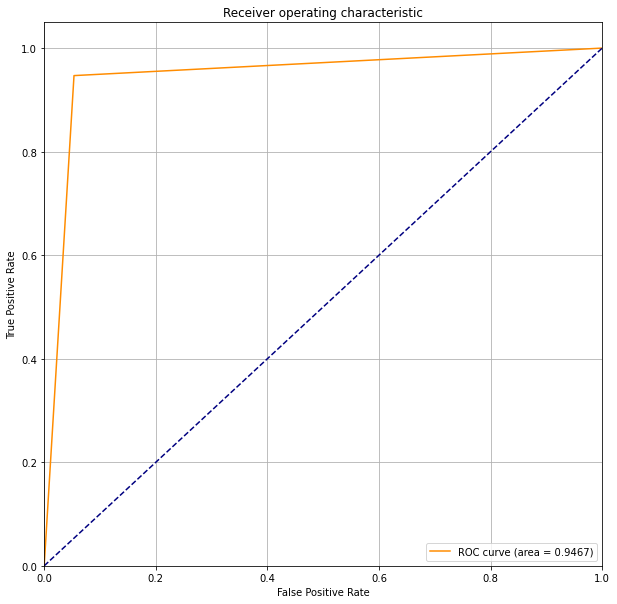

In [56]:
#ROC Using Scikit-learn XGBoost
fpr, tpr, thrhld = roc_curve(y_test_filtered.astype('int'), y_pred_xg)
roc_auc = roc_auc_score(y_test_filtered.astype('int'), y_pred_xg)
roc_plot(fpr,tpr,roc_auc)

In [57]:
#Confusion Matrix using Scikit-learn XGBoost
cm=confusion_matrix(y_test_filtered,y_pred_xg)
cm

array([[524007,  29567],
       [   114,   2031]], dtype=int64)

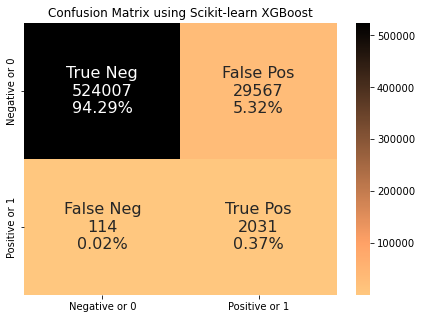

In [58]:
group_names = ['True Neg','False Pos','False Neg','True Pos'] 
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{var1}\n{var2}\n{var3}" for var1,var2,var3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(7,5)) 
sns.heatmap(cm,
            annot=labels,
            fmt='',
            cmap='copper_r',
            xticklabels=['Negative or 0','Positive or 1'], 
            yticklabels=['Negative or 0','Positive or 1'], 
            annot_kws={'size':16})
plt.title('Confusion Matrix using Scikit-learn XGBoost')
plt.show() 

In [64]:
#Using Scikit-learn XGBoost
xgbs = XGBClassifier(random_state=1,
                    eval_metric='logloss',
                    n_estimators=200,
                    scale_pos_weight=0.69,
                    learning_rate = 0.001,
                    gamma=0.5)

xgbs.fit(X_trained_filtered, y_trained_filtered)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0.5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.69, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
y_pred_xgbs = xgbs.predict(X_test_filtered)

In [66]:
#Confusion Matrix using Scikit-learn XGBoost
cmat=confusion_matrix(y_test_filtered,y_pred_xgbs)
cmat

array([[553224,    350],
       [   923,   1222]], dtype=int64)

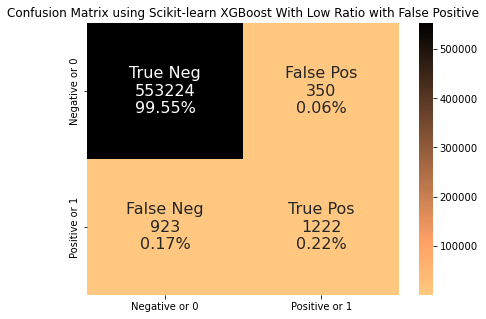

In [67]:
group_names = ['True Neg','False Pos','False Neg','True Pos'] 
group_counts = ['{0:0.0f}'.format(value) for value in cmat.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cmat.flatten()/np.sum(cmat)]
labels = [f"{var1}\n{var2}\n{var3}" for var1,var2,var3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(7,5)) 
sns.heatmap(cmat,
            annot=labels,
            fmt='',
            cmap='copper_r',
            xticklabels=['Negative or 0','Positive or 1'], 
            yticklabels=['Negative or 0','Positive or 1'], 
            annot_kws={'size':16})
plt.title('Confusion Matrix using Scikit-learn XGBoost With Low Ratio with False Positive')
plt.show() 

### False Positivity is 0.09% when I use scale_pos_weight=0.99, if I use scale_pos_weight=0.69 got False Positive 0.06%, for us False Positive Rate is an important for Customer Retention.

### Predictions

In [ ]:
X_t =X_test_filtered.reset_index()
y_pred=model.predict(dtest)
y_prob=model.predict(dtest)
y_hats_df = pd.DataFrame(data = y_pred, columns = ['y_pred'])
df_out = pd.merge(X_t, y_hats_df, how = 'inner', left_index = True, right_index = True)
dft=pd.DataFrame({'Actual': y_test_filtered, 'Predicted':y_prob})
dft=dft.reset_index()
dft.tail(5)

## Checking Ensembled Models

### Below Blocks I ran more than 4 hours in GPU/TPU was still running neither producing any results/nor getting any errors, my aim to get consolidated Ensembled Models Report,  so I need High Computing Environment 

In [81]:
#Checking with Multiple Classifiers
classifiers = ['LinearSVM', 'RadialSVM', 
               'Logistic',  'RandomForest', 
               'AdaBoost',  'DecisionTree', 
               'KNeighbors','GradientBoosting']

In [82]:
#Checking with Multiple Classifiers 
models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


In [76]:
data_bc =train_filtered
label_bc = data_bc["is_fraud"]
print("Fraud dataset:\n",data_bc.shape[0],"Records\n",data_bc.shape[1],"Features")

Fraud dataset:
 1296675 Records
 12 Features


In [ ]:
score1 = acc_score(data_bc,label_bc)
score1

In [ ]:
#num_feat1 = list(range(8,26))
num_feat1=['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','category','gender']
classifiers = score1["Classifier"].tolist()
score_bc = acc_score_num(data_bc,label_bc,f_score_bc,num_feat1)
score_bc.style.apply(highlight_max, subset = score_bc.columns[1:], axis=None)

### Logistic Regression

In [25]:
# Define the Logistic Regression model with weights
LRmodel = LogisticRegression(class_weight={0:1, 1:15}, random_state=5, solver='liblinear')
#X_test_filtered, y_test_filtered
# Get the model results
get_model_results(X_trained_filtered, y_trained_filtered , X_test_filtered, y_test_filtered, LRmodel)

ROC Score:
0.5314086754566256

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719


Confusion Matrix:
[[553574      0]
 [  2145      0]]


In [32]:
y_pred_lr = LRmodel.predict(X_test_filtered)

In [34]:
#Confusion Matrix using Logistic Regression
cmatlog=confusion_matrix(y_test_filtered,y_pred_lr)
cmatlog

array([[553574,      0],
       [  2145,      0]], dtype=int64)

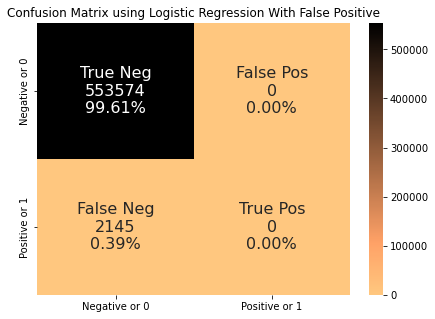

In [36]:
group_names = ['True Neg','False Pos','False Neg','True Pos'] 
group_counts = ['{0:0.0f}'.format(value) for value in cmatlog.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cmatlog.flatten()/np.sum(cmatlog)]
labels = [f"{var1}\n{var2}\n{var3}" for var1,var2,var3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(7,5)) 
sns.heatmap(cmatlog,
            annot=labels,
            fmt='',
            cmap='copper_r',
            xticklabels=['Negative or 0','Positive or 1'], 
            yticklabels=['Negative or 0','Positive or 1'], 
            annot_kws={'size':16})
plt.title('Confusion Matrix using Logistic Regression With False Positive')
plt.show() 

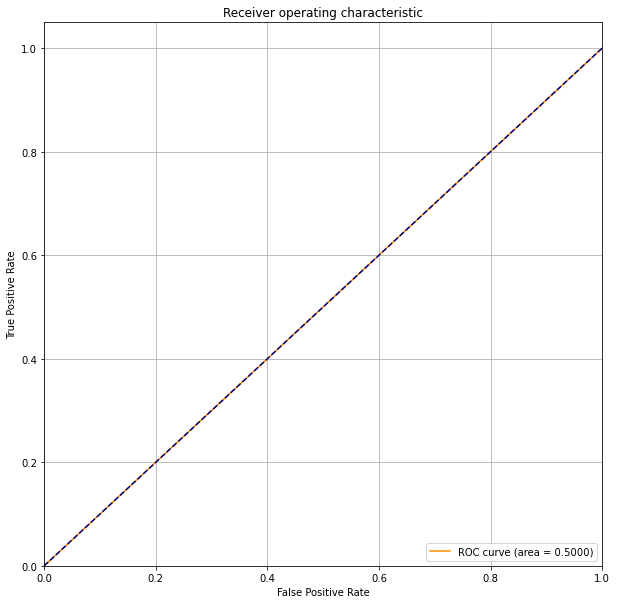

In [33]:
#ROC Using Scikit-learn XGBoost
fpr, tpr, thrhld = roc_curve(y_test_filtered.astype('int'), y_pred_lr)
roc_auc = roc_auc_score(y_test_filtered.astype('int'), y_pred_lr)
roc_plot(fpr,tpr,roc_auc)

### The Above Logistic Classification Report Precision with [Emphasize on False Positive] is 0's 1 and 1's 0.00
### with f1-score 0's 1 and 1's 0.0  

## New Ensembled Models with Voting Classifier

### Ensembled Model With Voting Classifiers

In [ ]:
# Define Models
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()


### Ensemble Model Adjusting Weights With Hard

In [29]:
# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15},
                          random_state=5,
                          solver='liblinear')

clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, 
                              criterion='gini', 
                              max_depth=8, 
                              max_features='log2',
                              min_samples_leaf=10, 
                              n_estimators=30, 
                              n_jobs=-1,
                              random_state=5)

clf3 = DecisionTreeClassifier(random_state=5,
                              class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_hard_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_trained_filtered, y_trained_filtered , X_test_filtered, y_test_filtered, ensemble_hard_model)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.90      0.23      0.36      2145

    accuracy                           1.00    555719
   macro avg       0.95      0.61      0.68    555719
weighted avg       1.00      1.00      1.00    555719


Confusion Matrix:
[[553519     55]
 [  1658    487]]


### The Above Ensemble Classification Report Precision with Hard Voting [Emphasize on False Positive] is 0's 1 and 1's 0.90, with f1-score 0's 1 and 1's 0.36 higher than Soft 

In [37]:
y_pred_en_hard = ensemble_hard_model.predict(X_test_filtered)

In [40]:
#Confusion Matrix using Ensemble Voting Hard
cmat_en_hard=confusion_matrix(y_test_filtered,y_pred_en_hard)
cmat_en_hard

array([[553519,     55],
       [  1658,    487]], dtype=int64)

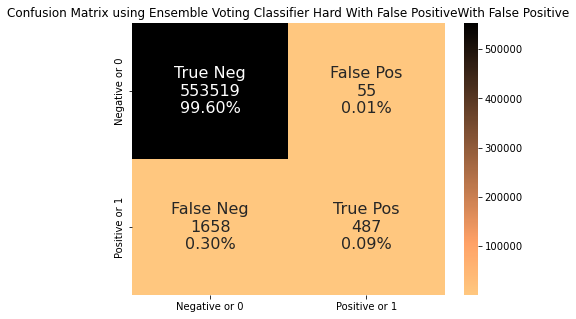

In [43]:
group_names = ['True Neg','False Pos','False Neg','True Pos'] 
group_counts = ['{0:0.0f}'.format(value) for value in cmat_en_hard.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cmat_en_hard.flatten()/np.sum(cmat_en_hard)]
labels = [f"{var1}\n{var2}\n{var3}" for var1,var2,var3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(7,5)) 
sns.heatmap(cmat_en_hard,
            annot=labels,
            fmt='',
            cmap='copper_r',
            xticklabels=['Negative or 0','Positive or 1'], 
            yticklabels=['Negative or 0','Positive or 1'], 
            annot_kws={'size':16})
plt.title('Confusion Matrix using Ensemble Voting Classifier Hard With False PositiveWith False Positive')
plt.show() 

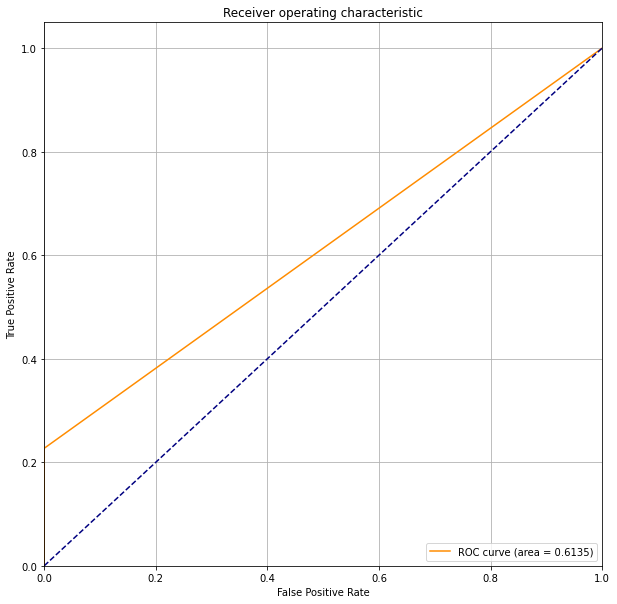

In [46]:
#ROC Using Ensemble Voting Classifier Hard 
fpr, tpr, thrhld = roc_curve(y_test_filtered.astype('int'), y_pred_en_hard)
roc_auc = roc_auc_score(y_test_filtered.astype('int'), y_pred_en_hard)
roc_plot(fpr,tpr,roc_auc)

### Ensemble Model Adjusting Weights With Soft

In [31]:
# Define the ensemble model
ensemble_softmodel = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results(X_trained_filtered, y_trained_filtered , X_test_filtered, y_test_filtered, ensemble_softmodel)

ROC Score:
0.9532164096325347

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.52      0.68      0.59      2145

    accuracy                           1.00    555719
   macro avg       0.76      0.84      0.79    555719
weighted avg       1.00      1.00      1.00    555719


Confusion Matrix:
[[552246   1328]
 [   689   1456]]


### The Above Ensemble Classification Report Precision with Hard Voting [Emphasize on False Positive] is 0's 1 and 1's 0.52 , with f1-score 0's 1 and 1's 0.59 lower than Hard 

In [38]:
y_pred_en_soft = ensemble_softmodel.predict(X_test_filtered)

In [41]:
#Confusion Matrix using Ensemble Voting Soft
cmat_en_soft=confusion_matrix(y_test_filtered,y_pred_en_soft)
cmat_en_soft

array([[552246,   1328],
       [   689,   1456]], dtype=int64)

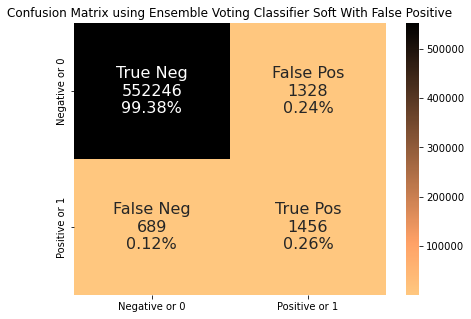

In [44]:
group_names = ['True Neg','False Pos','False Neg','True Pos'] 
group_counts = ['{0:0.0f}'.format(value) for value in cmat_en_soft.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cmat_en_soft.flatten()/np.sum(cmat_en_soft)]
labels = [f"{var1}\n{var2}\n{var3}" for var1,var2,var3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(7,5)) 
sns.heatmap(cmat_en_soft,
            annot=labels,
            fmt='',
            cmap='copper_r',
            xticklabels=['Negative or 0','Positive or 1'], 
            yticklabels=['Negative or 0','Positive or 1'], 
            annot_kws={'size':16})
plt.title('Confusion Matrix using Ensemble Voting Classifier Soft With False Positive')
plt.show() 

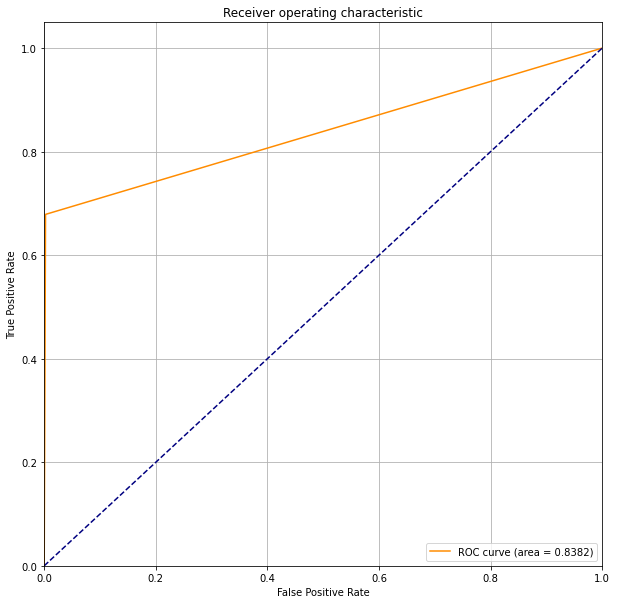

In [45]:
#ROC Using Ensemble Voting Classifier Soft 
fpr, tpr, thrhld = roc_curve(y_test_filtered.astype('int'), y_pred_en_soft)
roc_auc = roc_auc_score(y_test_filtered.astype('int'), y_pred_en_soft)
roc_plot(fpr,tpr,roc_auc)

In [ ]:
# Save model
#save model
joblib.dump(model, "C:/BHN/BHN_Fraud_Prediction_Model.dat") 

## Models Comparison

### XGB's XGBoost, Sci-Kit Learn XGBoost, Logistic Regression, Ensembled Model With Hard Voting , Ensembled Model Soft Voting Comparision

### Different Models Confusion Matrixs Comparison

### False Positive Rate XGB's XGBoost is 547,False Positive Rate Sci-Kit Learn's XGBoost is 350
### False Positive Rate Logistic Regression LibLinear is 0
### False Positive Rate Ensembled Model With Hard Voting is 55
### Ensembled Model With Soft Voting is 1328

### Based on only False Positive Rate considering false fraud classification which leads to Customers Churn 
### Logistic Regression with LibLinear is best model since FP is 0 and Ensembled Model With Hard Voting is 55

### Different Models ROC , AUC, False Positive and F1-Score Comparision

In [ ]:
#ROC Comparision- F1 Score and AOC and AUC Comparision and False Positive
#XGB's XGBoost 
ROC Score: AUC area 0.9867  F1-Score 0's 0.97 and 1's 0.12 F1-Score 0.64   False Positive 547/0.10%
#Scikit-Learn XGBoost 
ROC Score: AUC area 0.9467  F1-score 0's 0.97 and 1's 0.12 F1-Score=0.66   0's 1 and 1's 0.06 False Positive 350/ 0.06%
#Logistic Regression with LibLinear
ROC Score: 0.5314086754566256 AUC area 0.50  F1-Score 0 False Positive 0/0% AUC=0.5
#Ensembled Model With Hard Voting 
AUC area 0.6135     F1-Score=0.36  False Positive 55/0.01%
#Ensembled Model Soft Voting
ROC Score: 0.9532164096325347 AUC area 0.8382 False Positive 1328  F1-Score=0.59/0.24%


### Best Model with F1 Score 0.66, AUC 0.9467 and False Positive Rate 0.06% [350]#Scikit-Learn XGBoost
### Ensembled Model With Hard Voting  less False Positive and AUC 0.62 with low F1 Score 0.36 
### XGB's XGBoost AUC area 0.9867   F1-Score 0.64   False Positive 547/0.10%
### Logistic Regression with LibLinear ROC Score: 0.5314086754566256 AUC area 0.50  False Positive 0/0%  AUC=0.5
### Ensembled Model Soft Voting higher False Positive ROC Score: 0.9532164096325347 AUC area 0.8382 False Positive 1328  F1-Score=0.59/0.24%

### Conclusion: I compared different models also tested with Outliers Non Fraud transaction amount >2000 dollars  1090 records count against Model Prediction, found Model Predicted Correctly

## Future Work 

### 1) I did not do balancing data using SMOTE or Other Algorithms , which I am going to do next iteration

### 2) Planning To Do Balancing the Data With SMOTE and Extend my EDA and Features and Model Fine Tuning extra